# The task

Make predictions about the usefullness of a medicine kit for humans

- ``Target``: 0 is usefull, 1 is not usefull

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df_train = pd.read_csv(filepath_or_buffer="../data/raw/train.csv")
df_test = pd.read_csv(filepath_or_buffer="../data/raw/test.csv")

In [3]:
df_train.head()

,ID,Distributor,Product,Duration,Destination,Sales,Commission,Gender,Age,Target
0,fffe3800370038003900,7,1,22,122,31.0,0.00,NaN,20,0
1,fffe34003200370037003500,7,1,26,52,22.0,0.00,NaN,36,0
2,fffe32003100320030003200,7,10,15,83,63.0,0.00,NaN,34,0
3,fffe34003400310037003000,8,25,24,55,62.0,24.80,0.0,118,0
4,fffe32003400390038003000,6,16,12,122,19.8,11.88,NaN,26,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           6736 non-null   object 
 1   Distributor  6736 non-null   int64  
 2   Product      6736 non-null   int64  
 3   Duration     6736 non-null   int64  
 4   Destination  6736 non-null   int64  
 5   Sales        6736 non-null   float64
 6   Commission   6736 non-null   float64
 7   Gender       2032 non-null   float64
 8   Age          6736 non-null   int64  
 9   Target       6736 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 526.4+ KB


In [5]:
df_test.head()

,ID,Distributor,Product,Duration,Destination,Sales,Commission,Gender,Age
0,fffe31003600330038003500,6,16,8,60,69.30,41.58,NaN,51
1,fffe33003600300031003400,2,4,368,112,161.00,40.25,0.0,51
2,fffe320033003300,2,4,387,112,291.75,72.94,0.0,51
3,fffe390039003800,7,10,4,25,18.00,0.00,NaN,36
4,fffe3500350031003000,11,20,40,59,39.50,25.68,0.0,38


In [6]:
# Searching for missing values
df_train.isna().sum()

ID                0
Distributor       0
Product           0
Duration          0
Destination       0
Sales             0
Commission        0
Gender         4704
Age               0
Target            0
dtype: int64

In [7]:
# Spliting df_train into X and y(target)
X_train = df_train.drop(columns="Target")
y_train = df_train["Target"].copy()

In [8]:
# Descriptive statistics
X_train.describe()

# Max Age value is strange
# Min Sales negative?
# Min Duration negative?

,Distributor,Product,Duration,Destination,Sales,Commission,Gender,Age
count,6736.000000,6736.00000,6736.000000,6736.000000,6736.000000,6736.000000,2032.000000,6736.000000
mean,6.563539,9.40380,51.588034,81.681413,42.802316,10.469831,0.512795,39.880344
std,2.440587,6.62581,79.504738,39.530726,52.408053,20.342999,0.499959,13.872811
min,0.000000,0.00000,-1.000000,0.000000,-277.200000,0.000000,0.000000,1.000000
25%,6.000000,2.00000,10.000000,55.000000,18.000000,0.000000,0.000000,35.000000
50%,7.000000,10.00000,23.000000,86.000000,28.000000,0.000000,1.000000,36.000000
75%,7.000000,16.00000,54.000000,112.000000,49.500000,11.880000,1.000000,44.000000
max,15.000000,25.00000,444.000000,139.000000,666.000000,262.760000,1.000000,118.000000


<Axes: xlabel='Age'>

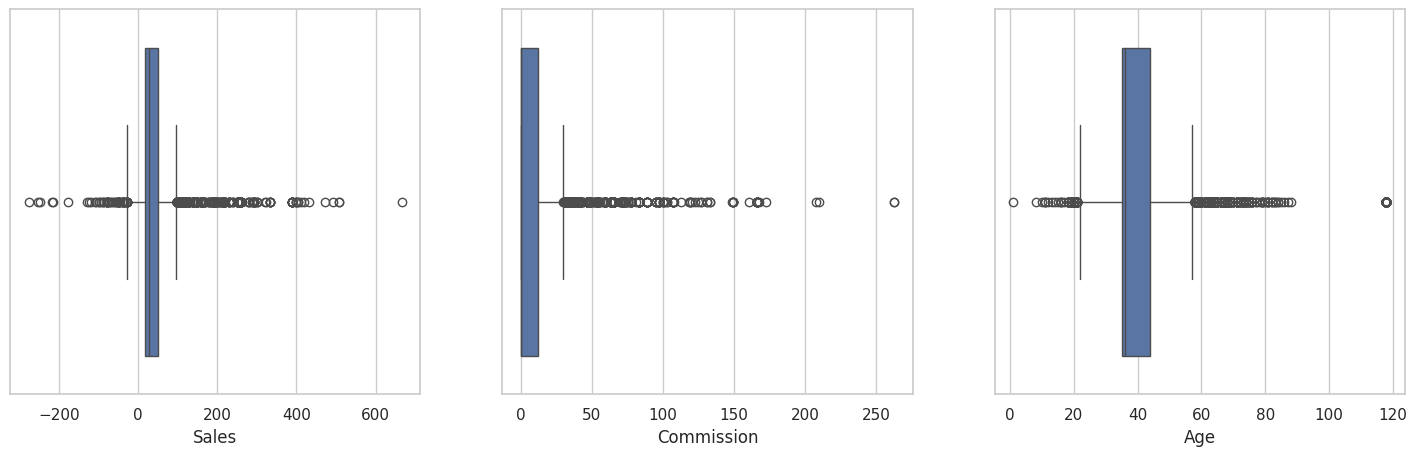

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
sns.boxplot(data=X_train, x=df_train["Sales"], ax=ax[0])
sns.boxplot(data=X_train, x=df_train["Commission"], ax=ax[1])
sns.boxplot(data=X_train, x=df_train["Age"], ax=ax[2])

In [32]:
X_train[X_train["Age"] > 100]["Age"].unique()

array([118])